<a href="https://colab.research.google.com/github/varunpothu/Research_Methods_Assignment/blob/main/R_M__Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Individual Project - Large Language Models**
---
* **Name :** Varun Pothu
* **Student ID :** 21080409
* **Subject ID :** 7PAM2015-0509-2023
* **Subject :** Research Methods in Data Science
---

**Brief and Aim of the Assignment:**
---

In this assignment, I aim to develop a text classification model to analyze and predict the sentiment of DEI-related articles. The goal is to train a BERT-style language model to classify the sentiment of articles based on their content and DEI topic. By fine-tuning the model using this dataset, I seek to enhance its ability to understand and categorize sentiments expressed in various DEI contexts.



**Problem Statement:**


---


Understanding the sentiment of DEI-related articles is crucial for gaining insights into public attitudes and discourse on Diversity, Equity, and Inclusion. I am tasked with developing a robust machine learning model to accurately predict the sentiment of these articles based on their content and associated DEI topics. By fine-tuning a BERT model on this dataset, I aim to improve automated sentiment analysis within the DEI domain, which can assist organizations and researchers in addressing and responding to DEI issues more effectively.

**Dataset Summary:**
---
The dataset includes articles related to Diversity, Equity, and Inclusion (DEI), encompassing columns such as title, content, URL, sentiment label, and basis. The basis column categorizes the underlying DEI topic into four types:

1.   Gender
2.   Race
3.   Disability
4.   Other

The sentiment label reflects the sentiment expressed in each article (e.g., positive, negative, neutral).



```
Dataset Link: https://huggingface.co/datasets/deancgarcia/Diversity
```



### Importing Libraries

In [5]:
pip install datasets transformers

In [1]:
import pandas as pand
import numpy as npy
import matplotlib.pyplot as plots
import seaborn as seas
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import tensorflow as tensf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tensf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plots
import numpy as npy


import numpy as npy
import tensorflow as tensf
import matplotlib.pyplot as plots
from transformers import TFBertForSequenceClassification
from sklearn.metrics import classification_report


In [2]:
# Load the dataset using Hugging Face's datasets
diversity_df = pand.read_csv("hf://datasets/deancgarcia/Diversity/train.csv")


# Display the first few rows
print(diversity_df.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


    ID                                              Title  \
0    1  Census data: US is diversifying, white populat...   
1    2  Workplace Diversity and Inclusion Gets Innovative   
2  404  Future immigration will change the face of Ame...   
3  410  Early Benchmarks Show ‘Post-Millennials’ on Tr...   
4  412  Millennials overtake Baby Boomers as America’s...   

                                             Content  Basis  \
0  No racial or ethnic group dominates for those ...      2   
1  wont be long before U. S. minorities are not i...      2   
2  A snapshot of the United States in 2065 would ...      2   
3  As a new generation of Americans begins to tak...      2   
4  Millennials have surpassed Baby Boomers as the...      2   

                                                 URL  Sentiment  Unnamed: 6  
0  https://apnews.com/article/race-and-ethnicity-...      False       156.0  
1  https://www.shrm.org/hr-today/news/hr-magazine...       True         NaN  
2  https://www.pewre

In [3]:
diversity_df.head()

,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6
0,1,"Census data: US is diversifying, white populat...",No racial or ethnic group dominates for those ...,2,https://apnews.com/article/race-and-ethnicity-...,False,156.0
1,2,Workplace Diversity and Inclusion Gets Innovative,wont be long before U. S. minorities are not i...,2,https://www.shrm.org/hr-today/news/hr-magazine...,True,NaN
2,404,Future immigration will change the face of Ame...,A snapshot of the United States in 2065 would ...,2,https://www.pewresearch.org/fact-tank/2015/10/...,True,NaN
3,410,Early Benchmarks Show ‘Post-Millennials’ on Tr...,As a new generation of Americans begins to tak...,2,https://www.pewresearch.org/social-trends/2018...,True,NaN
4,412,Millennials overtake Baby Boomers as America’s...,Millennials have surpassed Baby Boomers as the...,2,https://www.pewresearch.org/fact-tank/2020/04/...,True,NaN


### Data Investigation

Descriptive Statistics

In [4]:
# Display statistics for numerical columns
diversity_df.describe()

,ID,Basis,Unnamed: 6
count,482.000000,482.000000,1.0
mean,808.784232,2.510373,156.0
std,248.442874,0.738668,NaN
min,1.000000,1.000000,156.0
25%,584.250000,2.000000,156.0
50%,826.500000,3.000000,156.0
75%,1021.500000,3.000000,156.0
max,1299.000000,4.000000,156.0


In [5]:
# Display value counts for categorical columns
diversity_df['Sentiment'].value_counts()

,count
Sentiment,
False,326
True,156


 Checking for Missing Values

In [6]:
diversity_df.isnull().sum()

,0
ID,0
Title,0
Content,0
Basis,0
URL,0
Sentiment,0
Unnamed: 6,481


### Data Cleaning and Preprocessing

Handle Unwanted Data

In [7]:
# Drop the 'Unnamed: 6' column
diversity_df_cleaned = diversity_df.drop(columns=['Unnamed: 6'])

# Display the upandated DataFrame
diversity_df_cleaned.head()


,ID,Title,Content,Basis,URL,Sentiment
0,1,"Census data: US is diversifying, white populat...",No racial or ethnic group dominates for those ...,2,https://apnews.com/article/race-and-ethnicity-...,False
1,2,Workplace Diversity and Inclusion Gets Innovative,wont be long before U. S. minorities are not i...,2,https://www.shrm.org/hr-today/news/hr-magazine...,True
2,404,Future immigration will change the face of Ame...,A snapshot of the United States in 2065 would ...,2,https://www.pewresearch.org/fact-tank/2015/10/...,True
3,410,Early Benchmarks Show ‘Post-Millennials’ on Tr...,As a new generation of Americans begins to tak...,2,https://www.pewresearch.org/social-trends/2018...,True
4,412,Millennials overtake Baby Boomers as America’s...,Millennials have surpassed Baby Boomers as the...,2,https://www.pewresearch.org/fact-tank/2020/04/...,True


In [8]:
# First, split into train and test sets
train_dts, test_dts = train_test_split(diversity_df, test_size=0.2, random_state=123)


# Then, split the training set into training and validation sets
train_dts, val_dts = train_test_split(train_dts, test_size=0.1, random_state=123)

# Display the sizes of the resulting datasets
print(f"Training set size: {train_dts.shape[0]}")
print(f"Validation set size: {val_dts.shape[0]}")
print(f"Test set size: {test_dts.shape[0]}")




Training set size: 346
Validation set size: 39
Test set size: 97


In [9]:
print("Training Set:")
train_dts.head()

Training Set:


,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6
179,725,It’s Time To Stop Even Casually Misusing Disab...,Words Have PowerContent warning: This article...,3,https://www.forbes.com/sites/andrewpulrang/202...,False,NaN
339,973,The Atlanta attacks were not just racist and m...,I am heartbroken but I’m not surprised. The ta...,2,https://theconversation.com/the-atlanta-attack...,False,NaN
116,580,30 Days of MD: Seeing Disability Through a Dif...,This is Matt DeEmilio’s story: My name is Matt...,3,https://musculardystrophynews.com/2021/09/02/3...,True,NaN
147,634,How To Find Your Disability Community,Disability CommunityThere seems to be a wide ...,3,https://www.forbes.com/sites/andrewpulrang/202...,True,NaN
438,1154,"As Minneapolis burns, Trump’s presidency is si...",Violence has erupted across several US cities ...,2,https://theconversation.com/as-minneapolis-bur...,False,NaN


In [10]:
print("\nValidation Set:")
val_dts.head()



Validation Set:


,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6
139,616,A chance to 'amplify one another': What is Dis...,"For Tiffany Yu, Disability Pride Month is abo...",3,https://www.usatoday.com/story/news/nation/202...,True,NaN
233,817,Pages and prejudice: how queer texts could fig...,"Recently, the Australian Association for the T...",1,https://theconversation.com/pages-and-prejudic...,False,NaN
133,602,Disability advocates calling for reform as US ...,Becca Meyers asked for her mother to be her p...,3,https://abcnews.go.com/Sports/disability-advoc...,False,NaN
323,949,Incels are surprisingly diverse but united by ...,Incels are a misogynistic online community lin...,2,https://theconversation.com/incels-are-surpris...,False,NaN
123,588,"Swimming superstar Ellie Cole on diversity, ac...",The six time gold medallist is campaigning fo...,3,https://www.theguardian.com/sport/2021/aug/19/...,True,NaN


In [11]:
print("\nTest Set:")
test_dts.head()


Test Set:


,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6
427,1133,How Hollywood’s ‘Alien’ and ‘Predator’ movies ...,What makes Black people more likely than other...,2,https://theconversation.com/how-hollywoods-ali...,False,NaN
414,1113,‘My vote will be Black’ – A wave of Afro-Brazi...,Messages urging Afro Brazilians to support Bla...,2,https://theconversation.com/my-vote-will-be-bl...,False,NaN
5,414,"Meet the US workforce of the future: Older, mo...",ARE you a US based organization searching for ...,2,https://www2.deloitte.com/us/en/insights/deloi...,True,NaN
369,1033,Worker with disability alleges inflexible retu...,The U. S. Equal Employment Opportunity Commis...,3,https://www.hrdive.com/news/worker-with-disabi...,False,NaN
400,1085,Series explores lived experiences around abili...,Explore campus at your own pace. Expanding W&...,3,https://www.wm.edu/news/stories/2020/series-fe...,True,NaN


###EDA Analysis

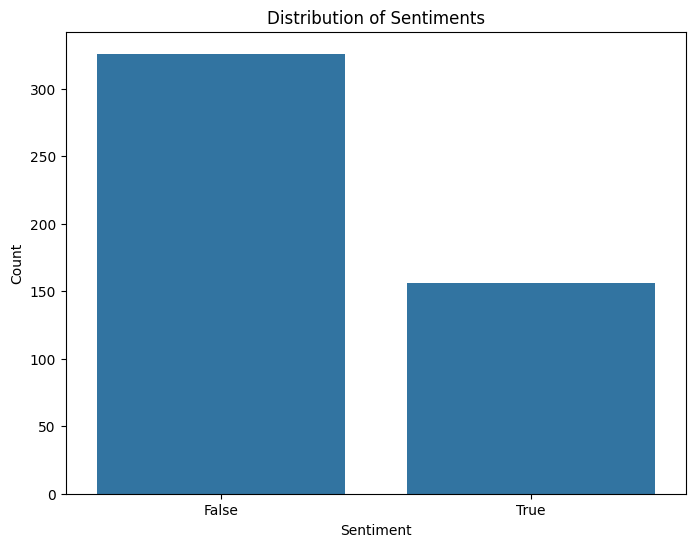

In [12]:
import matplotlib.pyplot as plots
import seaborn as seas

# Plot distribution of sentiment
plots.figure(figsize=(8, 6))
seas.countplot(x='Sentiment', data=diversity_df)
plots.title('Distribution of Sentiments')
plots.xlabel('Sentiment')
plots.ylabel('Count')
plots.show()


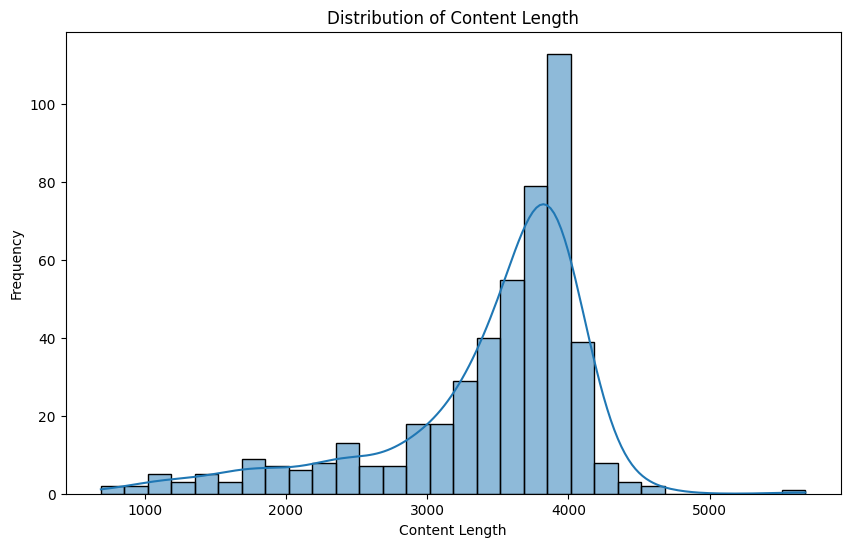

In [13]:
# Calculate the length of each content entry
diversity_df['Content_Length'] = diversity_df['Content'].apply(len)

# Plot distribution of content length
plots.figure(figsize=(10, 6))
seas.histplot(diversity_df['Content_Length'], bins=30, kde=True)
plots.title('Distribution of Content Length')
plots.xlabel('Content Length')
plots.ylabel('Frequency')
plots.show()


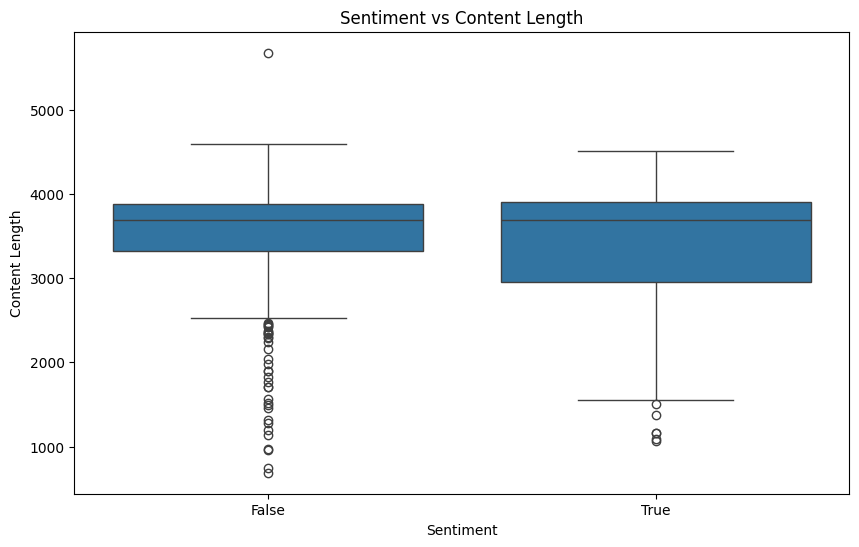

In [14]:
# Plot sentiment vs. content length
plots.figure(figsize=(10, 6))
seas.boxplot(x='Sentiment', y='Content_Length', data=diversity_df)
plots.title('Sentiment vs Content Length')
plots.xlabel('Sentiment')
plots.ylabel('Content Length')
plots.show()


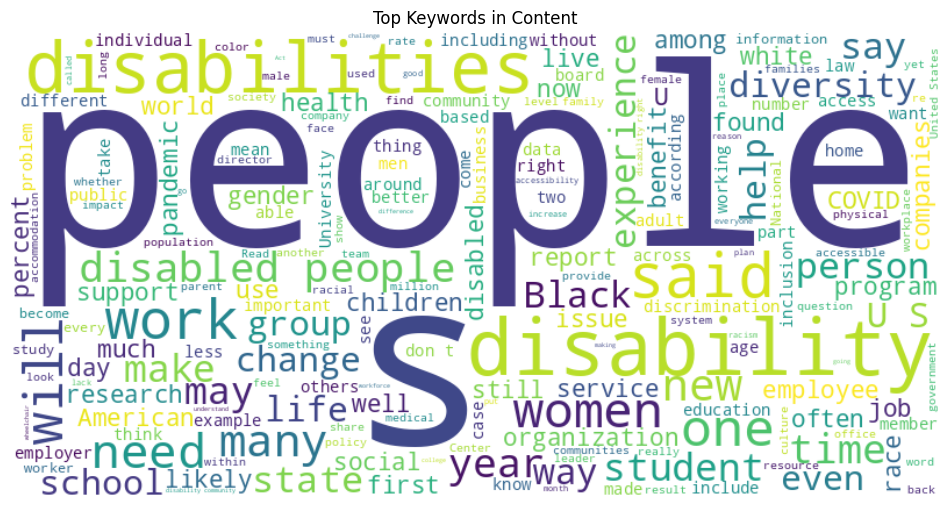

In [15]:
from wordcloud import WordCloud

# Combine all the content into a single string
text = ' '.join(diversity_df['Content'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plots.figure(figsize=(12, 8))
plots.imshow(wordcloud, interpolation='bilinear')
plots.axis('off')
plots.title('Top Keywords in Content')
plots.show()


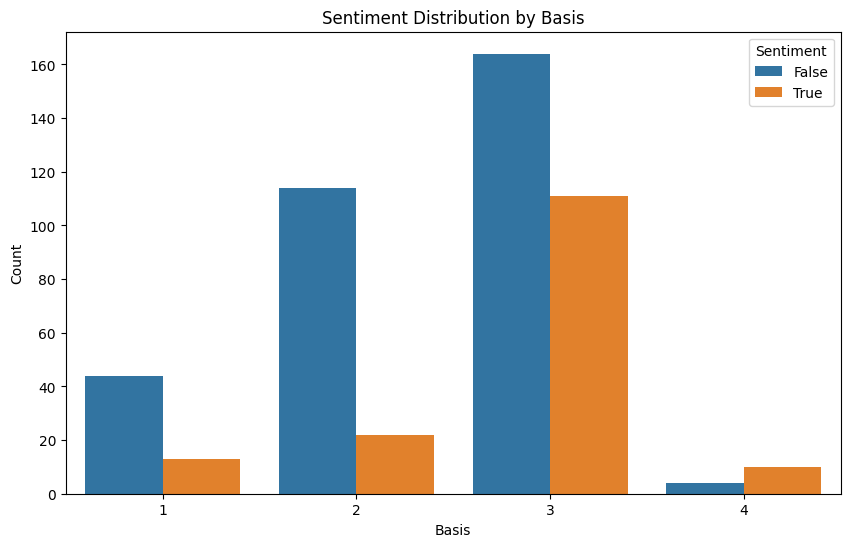

In [16]:
# Plot sentiment distribution by basis (if 'Basis' is a meaningful categorical feature)
plots.figure(figsize=(10, 6))
seas.countplot(x='Basis', hue='Sentiment', data=diversity_df)
plots.title('Sentiment Distribution by Basis')
plots.xlabel('Basis')
plots.ylabel('Count')
plots.legend(title='Sentiment')
plots.show()


Load and Tokenize Text Data

In [17]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text data
def tokenize(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=512, return_tensors="tf")

# Apply tokenization to train, validation, and test sets
train_inpyuts = tokenize(train_dts['Content'].tolist())
val_inpyuts = tokenize(val_dts['Content'].tolist())
test_inpyuts = tokenize(test_dts['Content'].tolist())


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Create TensorFlow Datasets

In [18]:
# Create TensorFlow datasets
def create_tensf_dataset(input_ids, attention_mask, labels, batch_size=4):
    dataset = tensf.data.Dataset.from_tensor_slices((
        {'input_ids': input_ids, 'attention_mask': attention_mask},
        labels
    ))
    dataset = dataset.shuffle(1000).batch(batch_size).prefetch(tensf.data.experimental.AUTOTUNE)
    return dataset

# Convert to TensorFlow datasets
train_dtdf = create_tensf_dataset(
    train_inpyuts['input_ids'].numpy(),
    train_inpyuts['attention_mask'].numpy(),
    train_dts['Sentiment'].astype(int).values
)

val_dtdf = create_tensf_dataset(
    val_inpyuts['input_ids'].numpy(),
    val_inpyuts['attention_mask'].numpy(),
    val_dts['Sentiment'].astype(int).values
)

test_dtdf = create_tensf_dataset(
    test_inpyuts['input_ids'].numpy(),
    test_inpyuts['attention_mask'].numpy(),
    test_dts['Sentiment'].astype(int).values
)

Load and Compile the BERT Model, Train the Model with Validation

Fine-Tuning and Evaluation for Strategy 1: Learning Rate = 3e-5

Fine-Tuning Strategy 1: Learning Rate = 3e-5, Epochs = 25


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/25
87/87 [==============================] - 87s 590ms/step - loss: 0.5986 - sparse_categorical_accuracy: 0.6734 - val_loss: 0.5674 - val_sparse_categorical_accuracy: 0.6667
Epoch 2/25
87/87 [==============================] - 46s 528ms/step - loss: 0.5004 - sparse_categorical_accuracy: 0.7543 - val_loss: 0.4006 - val_sparse_categorical_accuracy: 0.8462
Epoch 3/25
87/87 [==============================] - 48s 547ms/step - loss: 0.3408 - sparse_categorical_accuracy: 0.8728 - val_loss: 0.6474 - val_sparse_categorical_accuracy: 0.7436
Epoch 4/25
87/87 [==============================] - 47s 543ms/step - loss: 0.2358 - sparse_categorical_accuracy: 0.9075 - val_loss: 0.4318 - val_sparse_categorical_accuracy: 0.8205
Epoch 5/25
87/87 [==============================] - 46s 526ms/step - loss: 0.0886 - sparse_categorical_accuracy: 0.9711 - val_loss: 0.5444 - val_sparse_categorical_accuracy: 0.8205
Epoch 6/25
87/87 [==============================] - 48s 546ms/step - loss: 0.0511 - sparse_cate

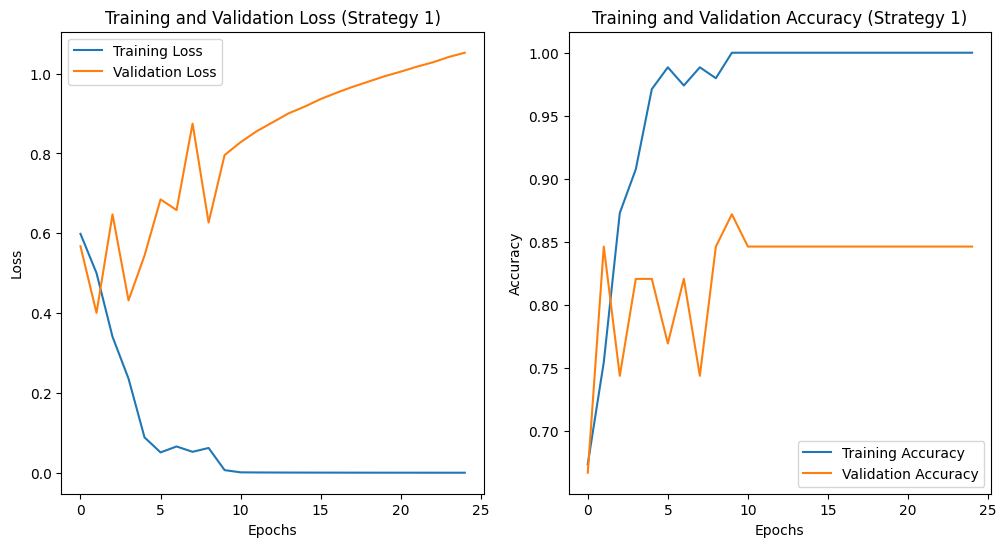

In [20]:
# Fine-Tuning and Evaluation for Strategy 1: Learning Rate = 3e-5, Epochs = 25
print("Fine-Tuning Strategy 1: Learning Rate = 3e-5, Epochs = 25")

# Load the BERT model for sequence classification
myfirstmodel = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Compile the model with a specific learning rate
optimizer1 = tensf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tensf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tensf.keras.metrics.SparseCategoricalAccuracy()]

myfirstmodel.compile(optimizer=optimizer1, loss=loss, metrics=metrics)

# Train the model
history1 = myfirstmodel.fit(
    train_dtdf,
    validation_data=val_dtdf,
    epochs=25
)

# Evaluate the model on the test dataset
test_loss1, test_accuracy1 = myfirstmodel.evaluate(test_dtdf)
print(f"Test Loss: {test_loss1}")
print(f"Test Accuracy: {test_accuracy1}")

# Predict the classes for the test dataset
y_pred_probs1 = myfirstmodel.predict(test_dtdf).logits
y_pred1 = npy.argmax(y_pred_probs1, axis=1)

# True labels
y_true1 = test_dts['Sentiment'].astype(int).values

# Print the classification report
print("\nDetailed Classification Report for Strategy 1:")
print(classification_report(y_true1, y_pred1, target_names=['Negative', 'Positive']))

# Plotting the training and validation loss
plots.figure(figsize=(12, 6))
plots.subplot(1, 2, 1)
plots.plot(history1.history['loss'], label='Training Loss')
plots.plot(history1.history['val_loss'], label='Validation Loss')
plots.title('Training and Validation Loss (Strategy 1)')
plots.xlabel('Epochs')
plots.ylabel('Loss')
plots.legend()

# Plotting the training and validation accuracy
plots.subplot(1, 2, 2)
plots.plot(history1.history['sparse_categorical_accuracy'], label='Training Accuracy')
plots.plot(history1.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plots.title('Training and Validation Accuracy (Strategy 1)')
plots.xlabel('Epochs')
plots.ylabel('Accuracy')
plots.legend()

plots.show()


Fine-Tuning Strategy 2: Learning Rate = 2e-5


Fine-Tuning Strategy 2: Learning Rate = 2e-5, Epochs = 25


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/25
87/87 [==============================] - 86s 589ms/step - loss: 0.6509 - sparse_categorical_accuracy: 0.6647 - val_loss: 0.5267 - val_sparse_categorical_accuracy: 0.7949
Epoch 2/25
87/87 [==============================] - 47s 541ms/step - loss: 0.4883 - sparse_categorical_accuracy: 0.7630 - val_loss: 0.4676 - val_sparse_categorical_accuracy: 0.7179
Epoch 3/25
87/87 [==============================] - 46s 527ms/step - loss: 0.3270 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.5326 - val_sparse_categorical_accuracy: 0.7949
Epoch 4/25
87/87 [==============================] - 46s 533ms/step - loss: 0.1763 - sparse_categorical_accuracy: 0.9335 - val_loss: 0.6814 - val_sparse_categorical_accuracy: 0.7179
Epoch 5/25
87/87 [==============================] - 46s 530ms/step - loss: 0.0897 - sparse_categorical_accuracy: 0.9711 - val_loss: 0.4380 - val_sparse_categorical_accuracy: 0.8718
Epoch 6/25
87/87 [==============================] - 47s 545ms/step - loss: 0.0127 - sparse_cate

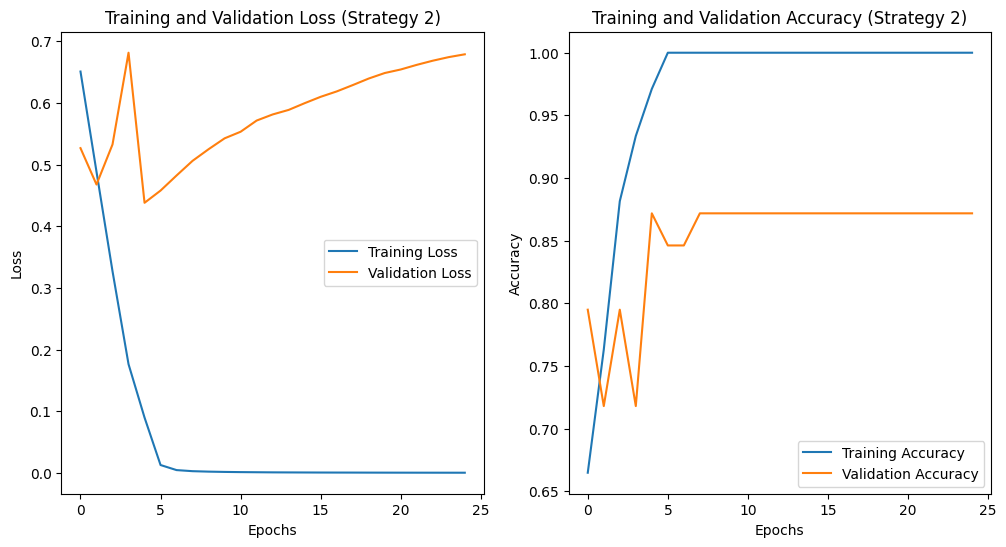

In [21]:
# Fine-Tuning and Evaluation for Strategy 2: Learning Rate = 2e-5, Epochs = 25
print("\nFine-Tuning Strategy 2: Learning Rate = 2e-5, Epochs = 25")

# Load the BERT model for sequence classification
mysecondmodel = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Compile the model with a specific learning rate
optimizer2 = tensf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tensf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tensf.keras.metrics.SparseCategoricalAccuracy()]

mysecondmodel.compile(optimizer=optimizer2, loss=loss, metrics=metrics)

# Train the model
history2 = mysecondmodel.fit(
    train_dtdf,
    validation_data=val_dtdf,
    epochs=25
)

# Evaluate the model on the test dataset
test_loss2, test_accuracy2 = mysecondmodel.evaluate(test_dtdf)
print(f"Test Loss: {test_loss2}")
print(f"Test Accuracy: {test_accuracy2}")

# Predict the classes for the test dataset
y_pred_probs2 = mysecondmodel.predict(test_dtdf).logits
y_pred2 = npy.argmax(y_pred_probs2, axis=1)

# True labels
y_true2 = test_dts['Sentiment'].astype(int).values

# Print the classification report
print("\nDetailed Classification Report for Strategy 2:")
print(classification_report(y_true2, y_pred2, target_names=['Negative', 'Positive']))

# Plotting the training and validation loss
plots.figure(figsize=(12, 6))
plots.subplot(1, 2, 1)
plots.plot(history2.history['loss'], label='Training Loss')
plots.plot(history2.history['val_loss'], label='Validation Loss')
plots.title('Training and Validation Loss (Strategy 2)')
plots.xlabel('Epochs')
plots.ylabel('Loss')
plots.legend()

# Plotting the training and validation accuracy
plots.subplot(1, 2, 2)
plots.plot(history2.history['sparse_categorical_accuracy'], label='Training Accuracy')
plots.plot(history2.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plots.title('Training and Validation Accuracy (Strategy 2)')
plots.xlabel('Epochs')
plots.ylabel('Accuracy')
plots.legend()

plots.show()

In [25]:
# using myfirstmodel:
model = myfirstmodel

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def predict_with_detailed_explanation(texts, true_labels):
    # Tokenize the inpyut texts
    inpyuts = tokenizer(texts, padding="max_length", truncation=True, max_length=512, return_tensors="tf")
    inpyut_ids = inpyuts['input_ids']
    attention_mask = inpyuts['attention_mask']

    # Make predictions
    predictions = model(inpyut_ids, attention_mask=attention_mask).logits
    predicted_labels = tensf.argmax(predictions, axis=1).numpy()

    # Map the labels to detailed explanations
    label_map = {
        0: "Negative: The text indicates a negative sentiment or unfavorable opinion.",
        1: "Positive: The text indicates a positive sentiment or favorable opinion."
    }

    # Generate detailed explanations for the predicted labels
    results = []
    for text, true_label, predicted_label in zip(texts, true_labels, predicted_labels):
        result = {
            "Text": text,
            "True Label": {
                "Label": true_label,
                "Explanation": label_map[true_label]
            },
            "Predicted Label": {
                "Label": predicted_label,
                "Explanation": label_map[predicted_label]
            }
        }
        results.append(result)

    return results

# Sample texts for prediction
sample_texts = [
    "This new policy aims to promote cultural diversity in the workplace.",
    "I am excited about the new technological advancements.",
    "New GP appointment rules in England are alarming and dangerous.",
    "I like the ambiance but I hate the food. It was not a bad experience."
]

# True labels for the sample texts (Example: Positive, Positive, Negative, Negative)
true_labels = [1, 1, 0, 0]

# Make predictions and get results with detailed explanations
detailed_results = predict_with_detailed_explanation(sample_texts, true_labels)

# Print results
for result in detailed_results:
    print(f"Text: {result['Text']}")
    print(f"True Label: {result['True Label']['Label']} ({result['True Label']['Explanation']})")
    print(f"Predicted Label: {result['Predicted Label']['Label']} ({result['Predicted Label']['Explanation']})")
    print()


Text: This new policy aims to promote cultural diversity in the workplace.
True Label: 1 (Positive: The text indicates a positive sentiment or favorable opinion.)
Predicted Label: 1 (Positive: The text indicates a positive sentiment or favorable opinion.)

Text: I am excited about the new technological advancements.
True Label: 1 (Positive: The text indicates a positive sentiment or favorable opinion.)
Predicted Label: 1 (Positive: The text indicates a positive sentiment or favorable opinion.)

Text: New GP appointment rules in England are alarming and dangerous.
True Label: 0 (Negative: The text indicates a negative sentiment or unfavorable opinion.)
Predicted Label: 0 (Negative: The text indicates a negative sentiment or unfavorable opinion.)

Text: I like the ambiance but I hate the food. It was not a bad experience.
True Label: 0 (Negative: The text indicates a negative sentiment or unfavorable opinion.)
Predicted Label: 0 (Negative: The text indicates a negative sentiment or unfav

In [26]:
# using myfirstmodel:
model = mysecondmodel

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def predict_with_detailed_explanation(texts, true_labels):
    # Tokenize the inpyut texts
    inpyuts = tokenizer(texts, padding="max_length", truncation=True, max_length=512, return_tensors="tf")
    inpyut_ids = inpyuts['input_ids']
    attention_mask = inpyuts['attention_mask']

    # Make predictions
    predictions = model(inpyut_ids, attention_mask=attention_mask).logits
    predicted_labels = tensf.argmax(predictions, axis=1).numpy()

    # Map the labels to detailed explanations
    label_map = {
        0: "Negative: The text indicates a negative sentiment or unfavorable opinion.",
        1: "Positive: The text indicates a positive sentiment or favorable opinion."
    }

    # Generate detailed explanations for the predicted labels
    results = []
    for text, true_label, predicted_label in zip(texts, true_labels, predicted_labels):
        result = {
            "Text": text,
            "True Label": {
                "Label": true_label,
                "Explanation": label_map[true_label]
            },
            "Predicted Label": {
                "Label": predicted_label,
                "Explanation": label_map[predicted_label]
            }
        }
        results.append(result)

    return results

# Sample texts for prediction
sample_texts = [
    "This new policy aims to promote cultural diversity in the workplace.",
    "I am excited about the new technological advancements.",
    "New GP appointment rules in England are alarming and dangerous.",
    "I like the ambiance but I hate the food. It was not a bad experience."
]

# True labels for the sample texts (Example: Positive, Positive, Negative, Negative)
true_labels = [1, 1, 0, 0]

# Make predictions and get results with detailed explanations
detailed_results = predict_with_detailed_explanation(sample_texts, true_labels)

# Print results
for result in detailed_results:
    print(f"Text: {result['Text']}")
    print(f"True Label: {result['True Label']['Label']} ({result['True Label']['Explanation']})")
    print(f"Predicted Label: {result['Predicted Label']['Label']} ({result['Predicted Label']['Explanation']})")
    print()


Text: This new policy aims to promote cultural diversity in the workplace.
True Label: 1 (Positive: The text indicates a positive sentiment or favorable opinion.)
Predicted Label: 1 (Positive: The text indicates a positive sentiment or favorable opinion.)

Text: I am excited about the new technological advancements.
True Label: 1 (Positive: The text indicates a positive sentiment or favorable opinion.)
Predicted Label: 1 (Positive: The text indicates a positive sentiment or favorable opinion.)

Text: New GP appointment rules in England are alarming and dangerous.
True Label: 0 (Negative: The text indicates a negative sentiment or unfavorable opinion.)
Predicted Label: 0 (Negative: The text indicates a negative sentiment or unfavorable opinion.)

Text: I like the ambiance but I hate the food. It was not a bad experience.
True Label: 0 (Negative: The text indicates a negative sentiment or unfavorable opinion.)
Predicted Label: 1 (Positive: The text indicates a positive sentiment or favor